# Import Libraties

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load Dataset

In [231]:
digits = tf.keras.datasets.mnist

In [232]:
(X_train, y_train),(X_test, y_test) = digits.load_data()

In [233]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [234]:
def display(X_train,y_train):
    # Plot some sample images
    plt.figure(figsize=(10,10))

    # Display the first 9 images from the training dataset
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_train[i])  
        plt.title(f"Label: {y_train[i]}")    
        plt.axis('off')                      

    plt.show()

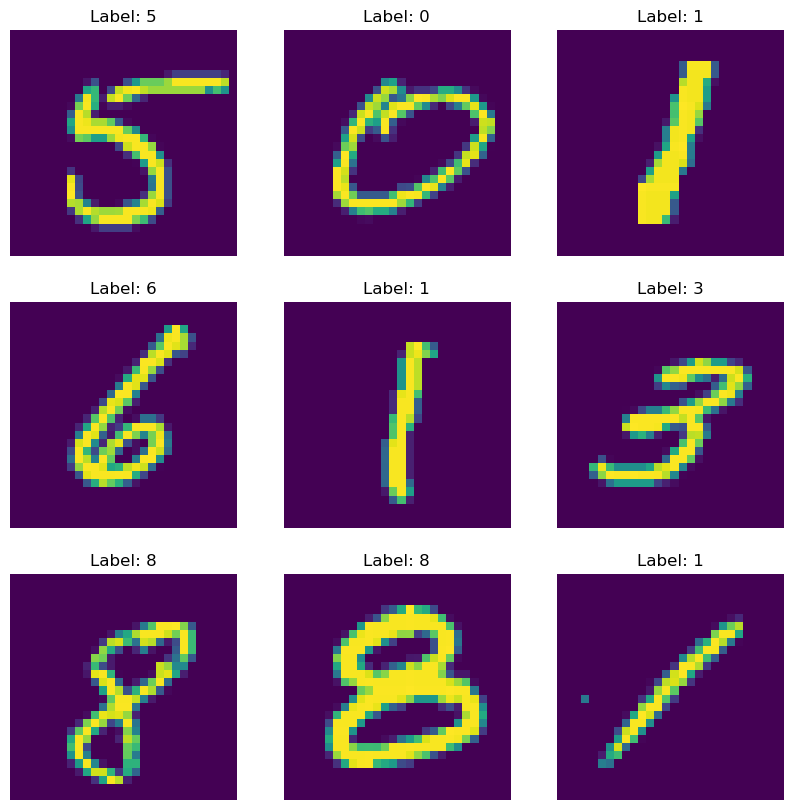

In [235]:
display(X_train,y_train)

# Normalize Datasets

In [236]:
# X_train = X_train / 255
# X_test = X_test /255
# X_val = X_val/255

# Build a Model

In [243]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D


def model():
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(28, 28,1)))
#     model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
#     model.add(GlobalAveragePooling2D())
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [244]:
# Create the LeNet-5 model with ReLU activation
model = model()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [245]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 648)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           6,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [246]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(
#     monitor='loss',  
#     patience=1,      
#     mode='min',      
#     verbose=1,       
#     baseline=0.05
# )

model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7695 - loss: 7.0131 - val_accuracy: 0.9392 - val_loss: 0.4377
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9470 - loss: 0.3444 - val_accuracy: 0.9488 - val_loss: 0.2321
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9584 - loss: 0.1779 - val_accuracy: 0.9567 - val_loss: 0.1476


In [277]:
X_test[77].shape

(28, 28)

7

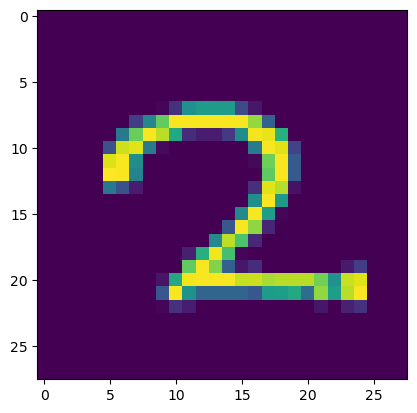

In [276]:
plt.imshow(X_test[77]) 
y_test[6666]

# Evaluation

In [248]:
y = model.predict(X_test[77].reshape(1,28,28,1))
print(np.round(y,3))
print(np.max(np.round(y,3)))
np.argmax(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1.0


2

# Deployment

In [249]:
# Save the model
model.save('digit_recognition_model.h5')

In [250]:
import pickle

# Save model configuration
with open('digit_recognition_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [251]:
model1 = tf.keras.models.load_model('digit_recognition_model.h5')

In [252]:
y1=model1.predict_step(X_test[77].reshape(1,28,28,1))
np.argmax(y1)

2

# THANKS